# CNN for Steering - Experiment 1 #

In this experiment we explored the performance of the **NVIDIA proposed End to End CNN model** for learning steering. 

Created: Sun Mar 7 20:08:24 2021

Last modified: Thu Mar 11 07:47:29 2021

@author: 
Kevin Machado Gamboa

CE903 - Group Project Team 6

University of Essex



## References:
    
1. **End to End Learning for Self-Driving Cars**, Karol Zieba, NVIDIA Corporation [link](https://arxiv.org/pdf/1604.07316v1.pdf)
    
2. **How to Simulate a Self-Driving Car**, Siraj Raval [GitHib link](https://github.com/llSourcell/How_to_simulate_a_self_driving_car/blob/master/model.py)

##  Libraries

In [1]:
import os
import cv2 as cv
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Configuring Tensorflow GPU

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
    
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

1 Physical GPUs, 1 Logical GPUs


Developed Functions

In [3]:
def plot_steering(x, title_='Steering Output Visualization'):
    
    fig, ax = plt.subplots(figsize=(15,3))
    # adding circunference
    ax.plot(np.linspace(-1,1,50), np.sqrt(1 - np.linspace(-1,1,50)**2))
    # adding steering value
    ax.scatter(x, np.sqrt(1-x**2), c='r', s= 300, marker="o", alpha=0.5)
    
    ax.axvline(ls='--',c='grey', lw=1)
    
    ax.set(title= title_, xlabel= 'normaliza values')
    ax.annotate('Right', xy=(0.2, 0.4), fontsize=50)
    ax.annotate('Left', xy=(-0.5, 0.4), fontsize=50)
    
    fig.show()

def transform_im(im, newsize):
    small_img = cv.resize(im, newsize)
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]
    return(small_img)

def normalize(x, mi, ma):
    return (x-mi)/(ma-mi)

def re_scale(x, mi, ma):
    return x * (ma-mi) + mi

def addAnnotation(image, yt, yp):
    # Font
    font = cv.FONT_HERSHEY_TRIPLEX
    # fontScale 
    fontScale = 0.5
    # Blue color in BGR 
    color = (255,0,0) 
    # Line thickness of 2 px 
    thickness = 1
    # Adding text
    text_t = 'Steering Truth: '+'{:0.4f}'.format(yt)
    text_p = 'Steering Prediction: '+'{:0.4f}'.format(yp)

    cv.putText(image, text_t , (50,100), font, fontScale, color, thickness, cv.LINE_AA)
    cv.putText(image, text_p, (50,80), font, fontScale, color, thickness, cv.LINE_AA)

    return image

## 1.Data Loading

In [4]:
# Loading Labels
data_ann_path = '../../../data'
data_out = pd.read_csv(data_ann_path + '/_controls.csv', header=None, )
print(data_out.iloc[:,1:].describe())
# Filtering output variables (steering, throttle, break)
y = data_out.iloc[:,1:].to_numpy()

                  1             2             3
count  10840.000000  10840.000000  10840.000000
mean       0.002927      0.304577      0.243133
std        0.115785      0.186235      0.428789
min       -0.357241      0.000000      0.000000
25%       -0.066268      0.353101      0.000000
50%       -0.000194      0.379431      0.000000
75%        0.060129      0.381201      0.000000
max        0.800000      0.700000      1.000000


In [5]:
# Loading Images
im_path = os.path.abspath('..\..\..\data\lane_detection\compressed')
im_files = os.listdir(im_path)
newsize = (300, 300)
im_dataset_pil = []
X = []
for idx, name in tqdm(enumerate(im_files)):
    X.append(cv.resize(cv.imread(os.path.join(im_path, name)), newsize, interpolation = cv.INTER_AREA)/127.5-1.0)
#   im_dataset_pil.append(Image.open(os.path.join(im_path, name)))
#   X.append(np.array(im_dataset_pil[idx].resize(newsize))/127.5-1.0)

10841it [06:00, 30.05it/s]


In [6]:
im_files[:]

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '1000.png',
 '10000.png',
 '10001.png',
 '10002.png',
 '10003.png',
 '10004.png',
 '10005.png',
 '10006.png',
 '10007.png',
 '10008.png',
 '10009.png',
 '1001.png',
 '10010.png',
 '10011.png',
 '10012.png',
 '10013.png',
 '10014.png',
 '10015.png',
 '10016.png',
 '10017.png',
 '10018.png',
 '10019.png',
 '1002.png',
 '10020.png',
 '10021.png',
 '10022.png',
 '10023.png',
 '10024.png',
 '10025.png',
 '10026.png',
 '10027.png',
 '10028.png',
 '10029.png',
 '1003.png',
 '10030.png',
 '10031.png',
 '10032.png',
 '10033.png',
 '10034.png',
 '10035.png',
 '10036.png',
 '10037.png',
 '10038.png',
 '10039.png',
 '1004.png',
 '10040.png',
 '10041.png',
 '10042.png',
 '10043.png',
 '10044.png',
 '10045.png',
 '10046.png',
 '10047.png',
 '10048.png',
 '10049.png',
 '1005.png',
 '10050.png',
 '10051.png',
 '10052.png',
 '10053.png',
 '10054.png',
 '10055.png',
 '10056.png',
 '10057.png',
 '10058.png',
 '10059.png',
 '1006.png',
 '10060.png',
 '10061.png'

In [7]:
X[0].nbytes/1000000

2.16

### Steering Visualizarion

C:\Users\kevin\Anaconda3\envs\WindowsNoEditor\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


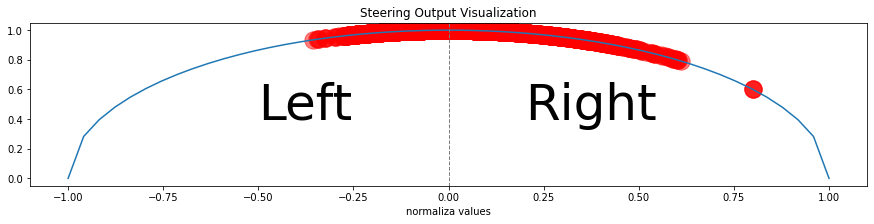

In [8]:
plot_steering(y[:,0])

In [9]:
np.shape(X)


KeyboardInterrupt: 

In [ ]:
X = np.array(X)
#mi, ma = min(y), max(y)
#y = normalize(np.array(y),mi,ma)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, x_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=0)

In [ ]:
input_shape = X_train[0].shape
print('Input shape:', input_shape)

## 2. Model Development

The model architecture developed corresponds to the proposed by Nvidia in their 2016 paper (End to End Learning for Self-Driving Cars)[https://arxiv.org/pdf/1604.07316v1.pdf]. In this implementation the input image dimensions were 66x200@3. The first layer performs image normalization. This is followed by 5 convolutional layers, the first three convolutional layers had kernels size 5x5 with 2x2 stride and the last two convolutional layers had kernel size 3x3 with non-stride. The final part of the architecture was composed by a three fully connected dense layers " leading to an output control value which is the inverse turning radius". In their article **"To remove a bias towards driving straight the training data includes a higher proportion of frames that represent road curves"**. They also mentioned **data augmentation** corresponding to artificial shift and rotations


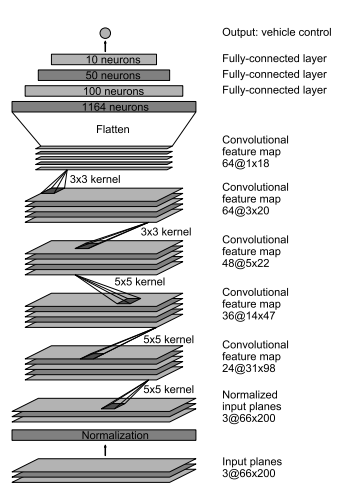


In our implementation, the image dimensions are 300x300@3

In [ ]:
class multibranch_car_control_model:
    def __init__(self, input_shape):
        # Initialise the model
        self.input_shape = input_shape
        self.build_multivariable_model()

#     def common_feature_extractor(self):
#         feature_extractor_trunk = tf.keras.Sequential([
#             Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same', input_shape=self.input_shape),
#             Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
#             Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
#             Conv2D(64, 3, activation='elu', padding='same'),
#             Conv2D(64, 3, activation='elu', padding='same'),
#             Dropout(0.5),
#             Flatten()
#         ])
#         return feature_extractor_trunk

    def steering_branch(self):
        steering_model_branch = tf.keras.Sequential([
            Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(64, 3, activation='elu', padding='same'),
            Conv2D(64, 3, activation='elu', padding='same'),
            Dropout(0.5),
            Flatten(),
            Dense(100, activation='elu'),
            Dense(50, activation='elu'),
            Dense(10, activation='elu', name='steering_output')
            
        ])
        
        return Dense(1, activation='tanh')(steering_model_branch.get_layer('steering_output').output)

    def throttle_branch(self):
        throttle_model_branch = tf.keras.Sequential([
            Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(64, 3, activation='elu', padding='same'),
            Conv2D(64, 3, activation='elu', padding='same'),
            Dropout(0.5),
            Flatten(),
            Dense(100, activation='elu'),
            Dense(100, activation='elu'),
            Dense(100, activation='elu', name='throttle_output')
            
        ])
        return Dense(1, activation='sigmoid')(throttle_model_branch.get_layer('throttle_output').output)

    def break_branch(self):
        brak_model_branch = tf.keras.Sequential([
            Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
            Conv2D(64, 3, activation='elu', padding='same'),
            Conv2D(64, 3, activation='elu', padding='same'),
            Dropout(0.5),
            Flatten(),
            Dense(100, activation='relu'),
            Dense(100, activation='relu'),
            Dense(100, activation='relu'),
            Dense(1, activation='sigmoid', name='break_output')
        ])
        return brak_model_branch.get_layer('break_output').output

    def build_multivariable_model(self):
        self.model = tf.keras.models.Model(
            inputs=tf.keras.Input(self.input_shape),
            outputs=[self.steering_branch(), self.throttle_branch(), self.break_branch()],
            name='multibranch_car_control_model')

In [ ]:
class multibranch_car_control_model:
    def __init__(self, input_shape):
        # Initialise the model
        self.input_shape = input_shape
        self.build_multivariable_model()

#     def common_feature_extractor(self):
#         feature_extractor_trunk = tf.keras.Sequential([
#             Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same', input_shape=self.input_shape),
#             Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
#             Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
#             Conv2D(64, 3, activation='elu', padding='same'),
#             Conv2D(64, 3, activation='elu', padding='same'),
#             Dropout(0.5),
#             Flatten()
#         ])
#         return feature_extractor_trunk

    def steering_branch(self, x_in):
        x = Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same')(x_in)
        x = Flatten()(x)
        x = Dense(10, activation='elu')(x)
        x = Dense(1, activation='tanh', name='steering_output')(x)

#         steering_model_branch = tf.keras.Sequential([
#             Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same', name='conv_steer', input_shape=self.input_shape),
# #             Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
# #             Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
# #             Conv2D(64, 3, activation='elu', padding='same'),
# #             Conv2D(64, 3, activation='elu', padding='same'),
# #             Dropout(0.5),
#             Flatten(),
#             Dense(100, activation='elu'),
#             Dense(50, activation='elu'),
#             Dense(10, activation='elu', name='steering_output')
            
#         ])
        
        
        return x #Dense(1, activation='tanh')(steering_model_branch.get_layer('steering_output').output)

    def throttle_branch(self, x_in):
        x = Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same')(x_in)
        x = Flatten()(x)
        x = Dense(10, activation='elu')(x)
        x = Dense(1, activation='sigmoid', name='throttle_output')(x)
#         throttle_model_branch = tf.keras.Sequential([
#             Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same', name='conv_t',input_shape=self.input_shape),
# #             Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
# #             Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
# #             Conv2D(64, 3, activation='elu', padding='same'),
#             Conv2D(64, 3, activation='elu', padding='same'),
# #             Dropout(0.5),
#             Flatten(),
#             Dense(100, activation='elu'),
#             Dense(100, activation='elu'),
#             Dense(100, activation='elu', name='throttle_output')
            
#         ])
        return x #Dense(1, activation='sigmoid')(throttle_model_branch.get_layer('throttle_output').output)

    def break_branch(self, x_in):
        x = Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same')(x_in)
        x = Flatten()(x)
        x = Dense(10, activation='elu')(x)
        x = Dense(1, activation='sigmoid', name='break_output')(x)
#         brak_model_branch = tf.keras.Sequential([
#             Conv2D(24, 5, strides=(2, 2), activation='elu', padding='same', name='conv_b',input_shape=self.input_shape),
# #             Conv2D(36, 5, strides=(2, 2), activation='elu', padding='same'),
# #             Conv2D(48, 5, strides=(2, 2), activation='elu', padding='same'),
# #             Conv2D(64, 3, activation='elu', padding='same'),
# #             Conv2D(64, 3, activation='elu', padding='same'),
# #             Dropout(0.5),
#             Flatten(),
#             Dense(100, activation='relu'),
#             Dense(100, activation='relu'),
#             Dense(100, activation='relu'),
#             Dense(1, activation='sigmoid', name='break_output')
#         ])
        return x #brak_model_branch.get_layer('break_output').output


    def build_multivariable_model(self):
        x_in = tf.keras.Input(self.input_shape)
        self.model = tf.keras.models.Model(
            inputs= x_in,
            outputs=[self.steering_branch(x_in), self.throttle_branch(x_in), self.break_branch(x_in)],
            name='multibranch_car_control_model')
        

In [ ]:
#from automata.car_control_models import multibranch_car_control_model as car_control_model

model = multibranch_car_control_model(input_shape)
model.model.summary()

In [ ]:
# Model Parameters
optimizer_f = tf.keras.optimizers.Adam(lr=1.0e-5)
loss_f = tf.keras.losses.MeanSquaredError()
metric_f = tf.keras.metrics.RootMeanSquaredError()
# Compiling model
model.model.compile(optimizer=optimizer_f,
                    loss=loss_f,
                    metrics=metric_f            
                   )

In [ ]:
checkpoint_path, to_monitor = 'saved_model_full_data/', 'model-{epoch:03d}-{val_loss:.4f}'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path+to_monitor+'.h5',
                                                monitor='val_loss',
                                                verbose=0,
                                                save_best_only=True,
                                                mode='auto')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
# X_train, X_val, y_train, y_val
history_1 = model.model.fit(X_train, y_train, epochs=600, batch_size=50, validation_data=(X_val, y_val), callbacks = [early_stop, checkpoint])

In [ ]:
model.model.predict(X)[0]

In [ ]:
model.model.predict(X)[0]

In [ ]:
plot_steering(y[:,0], 'Autopilot Steering')
plot_steering(model.model.predict(X)[0], 'Model Steering')

In [ ]:
# model.save('Nvidia_based_model.h5')

## Model Implementation

The first step for implementing this model in the Carla Simulator is to load the model

In [ ]:
model_path = 'saved_model/model-008-0.01.h5'
nvidia_steering_model = tf.keras.models.load_model(model_path)

After loading the model, we are ready to predict. To show an example of this, we will use an image from our database, predict the steering and compared with the real one

In [ ]:
i = 1
img = np.copy(X[i])
yp = nvidia_steering_model.predict(np.expand_dims(img, axis=0))[0][0]
yt = y[i]
img = addAnnotation(img, yt,yp)

fig,axes = plt.subplots(figsize=(15,10))
axes.imshow(img)